# Author: Toni Davis 
## Harnessing the Power of AI for Effective Lead Conversion Prediction in General Sales and Marketing Project

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import metrics
from sklearn import svm

In [30]:
training = pd.read_csv("NumericTrain.csv")
testing = pd.read_csv("NumericTest.csv")

training = training.drop('Unnamed: 0', axis = 1)
testing = testing.drop('Unnamed: 0', axis = 1)

In [31]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107392 entries, 0 to 107391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TimeSpent       107392 non-null  int64  
 1   PagesViewed     107392 non-null  float64
 2   LeadStatus      107392 non-null  int64  
 3   EmailSent       107392 non-null  int64  
 4   LeadSource      107392 non-null  int64  
 5   PaymentHistory  107392 non-null  int64  
 6   Converted       107392 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 5.7 MB


In [32]:
Features = ['TimeSpent','PagesViewed','LeadStatus','EmailSent','LeadSource','PaymentHistory']
Classes = ['0','1']

## Logistic Regression

In [13]:
cls = LogisticRegression(max_iter = 1000)
X = training.drop('Converted', axis = 1)
y = training['Converted']
X_test = testing.drop('Converted', axis = 1)
y_test = testing['Converted']
cls.fit(X,y)

LogisticRegression(max_iter=1000)

In [22]:
print(cls.coef_)
print(cls.feature_names_in_)
print(cls.intercept_)

[[ 0.00271194  0.05163807 -0.47520552 -1.70440654  0.03996937 -0.76064178]]
['TimeSpent' 'PagesViewed' 'LeadStatus' 'EmailSent' 'LeadSource'
 'PaymentHistory']
[-1.82494218]


In [6]:
# Training  
y_pred = cls.predict(X)
accuracy_score(y, y_pred)

0.9652301847437426

In [7]:
f1_score(y,y_pred)

0.4035143769968051

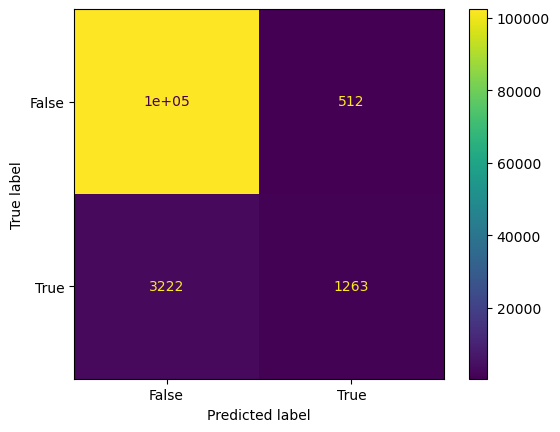

In [8]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [9]:
# Testing 
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666702389883185

In [10]:
f1_score(y_test,y_pred)

0.40611075747931247

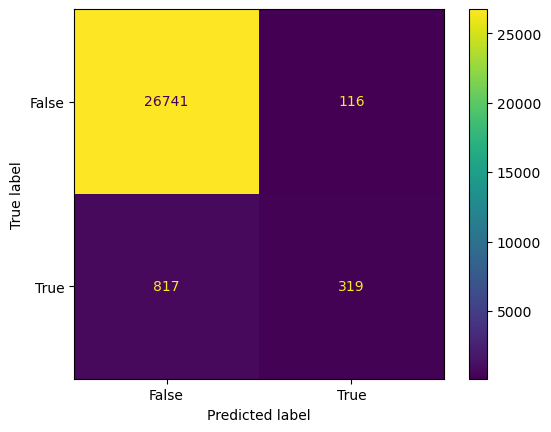

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

<Axes: >

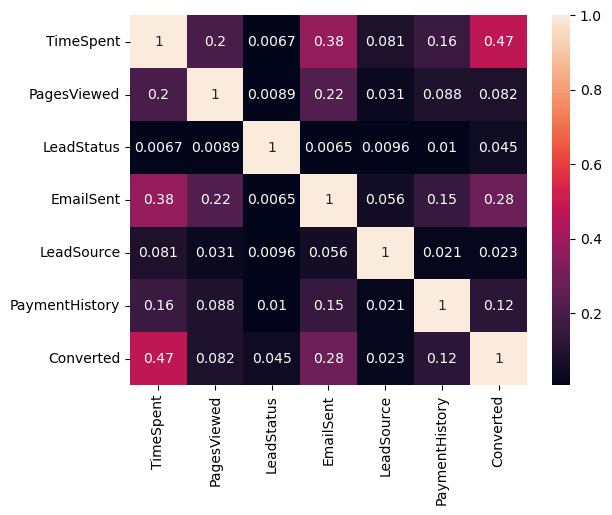

In [12]:
sns.heatmap(training.corr().abs(), annot=True)

I noticed there were a few key features that impact the coversion feature. With this in mind I try to create a logistic regression model using TimeSpent, EmailSent, PaymentHistory.

In [23]:
training2 = training.drop(['PagesViewed','LeadStatus','LeadSource'], axis =1)
testing2 = testing.drop(['PagesViewed','LeadStatus','LeadSource'], axis =1)

In [24]:
cls = LogisticRegression(max_iter = 1000)
X = training2.drop('Converted', axis = 1)
y = training2['Converted']
X_test = testing2.drop('Converted', axis = 1)
y_test = testing2['Converted']
cls.fit(X,y)

LogisticRegression(max_iter=1000)

In [25]:
print(cls.coef_)
print(cls.feature_names_in_)
print(cls.intercept_)

[[ 0.00246373 -1.53950853 -0.67638124]]
['TimeSpent' 'EmailSent' 'PaymentHistory']
[-2.26111335]


In [15]:
#Training 
y_pred = cls.predict(X)
accuracy_score(y, y_pred)

0.9652581197854588

In [16]:
f1_score(y,y_pred)

0.4082474226804124

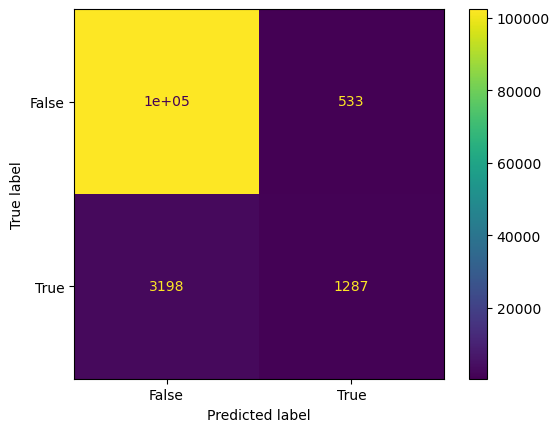

In [17]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [18]:
# Testing
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.9668488550709106

In [19]:
f1_score(y_test,y_pred)

0.41340075853350194

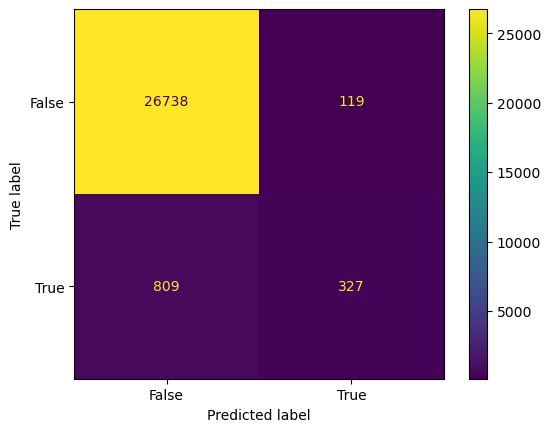

In [20]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

<Axes: >

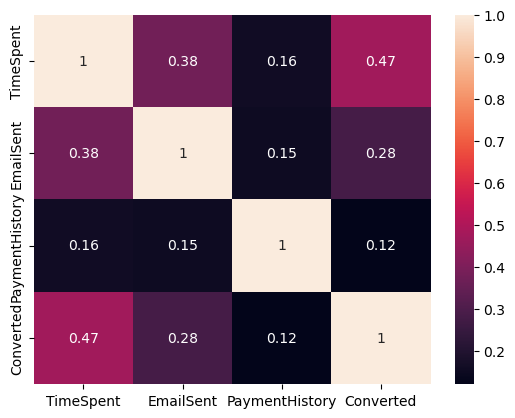

In [21]:
sns.heatmap(training2.corr().abs(), annot=True)

There was small improvement seen with narrowing down the features. I further noticed there is a pretty high correlation between TimeSpent and EmailSent. I decided to modify the model by droping EmailSent because of its correlation with TimeSpent and its lower correlation to converted. 

In [26]:
training3 = training2.drop(['EmailSent'], axis =1)
testing3 = testing2.drop(['EmailSent'], axis =1)

In [27]:
cls = LogisticRegression(max_iter = 1000)
X = training3.drop('Converted', axis = 1)
y = training3['Converted']
X_test = testing3.drop('Converted', axis = 1)
y_test = testing3['Converted']
cls.fit(X,y)

LogisticRegression(max_iter=1000)

In [28]:
print(cls.coef_)
print(cls.feature_names_in_)
print(cls.intercept_)

[[ 0.00336977 -0.86623715]]
['TimeSpent' 'PaymentHistory']
[-3.36376987]


In [24]:
#Training 
y_pred = cls.predict(X)
accuracy_score(y, y_pred)

0.9643828218116806

In [25]:
f1_score(y,y_pred)

0.3827658544456996

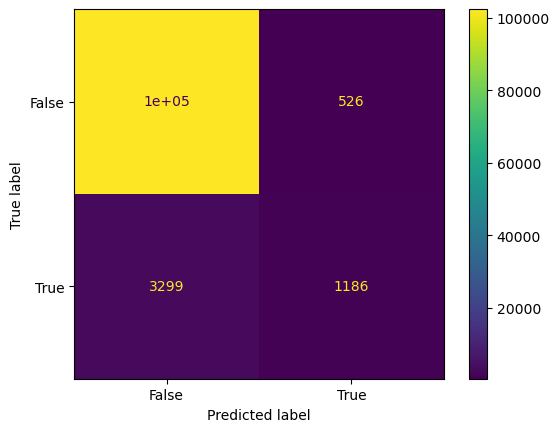

In [26]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [27]:
# Testing 
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.9656699889258029

In [28]:
f1_score(y_test,y_pred)

0.3803997421018698

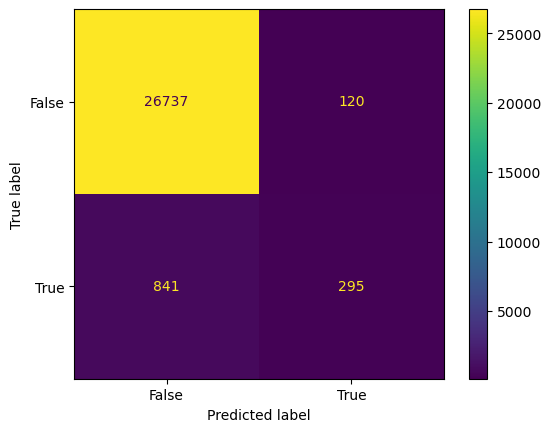

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

The new adjustment did not offer imporvment with the removal of EmailSent. 

## Tree Methods 

### Decision Tree Classifier 

In [44]:
method = tree.DecisionTreeClassifier( random_state=0, max_depth= 3)
tree1 = method.fit(X,y)

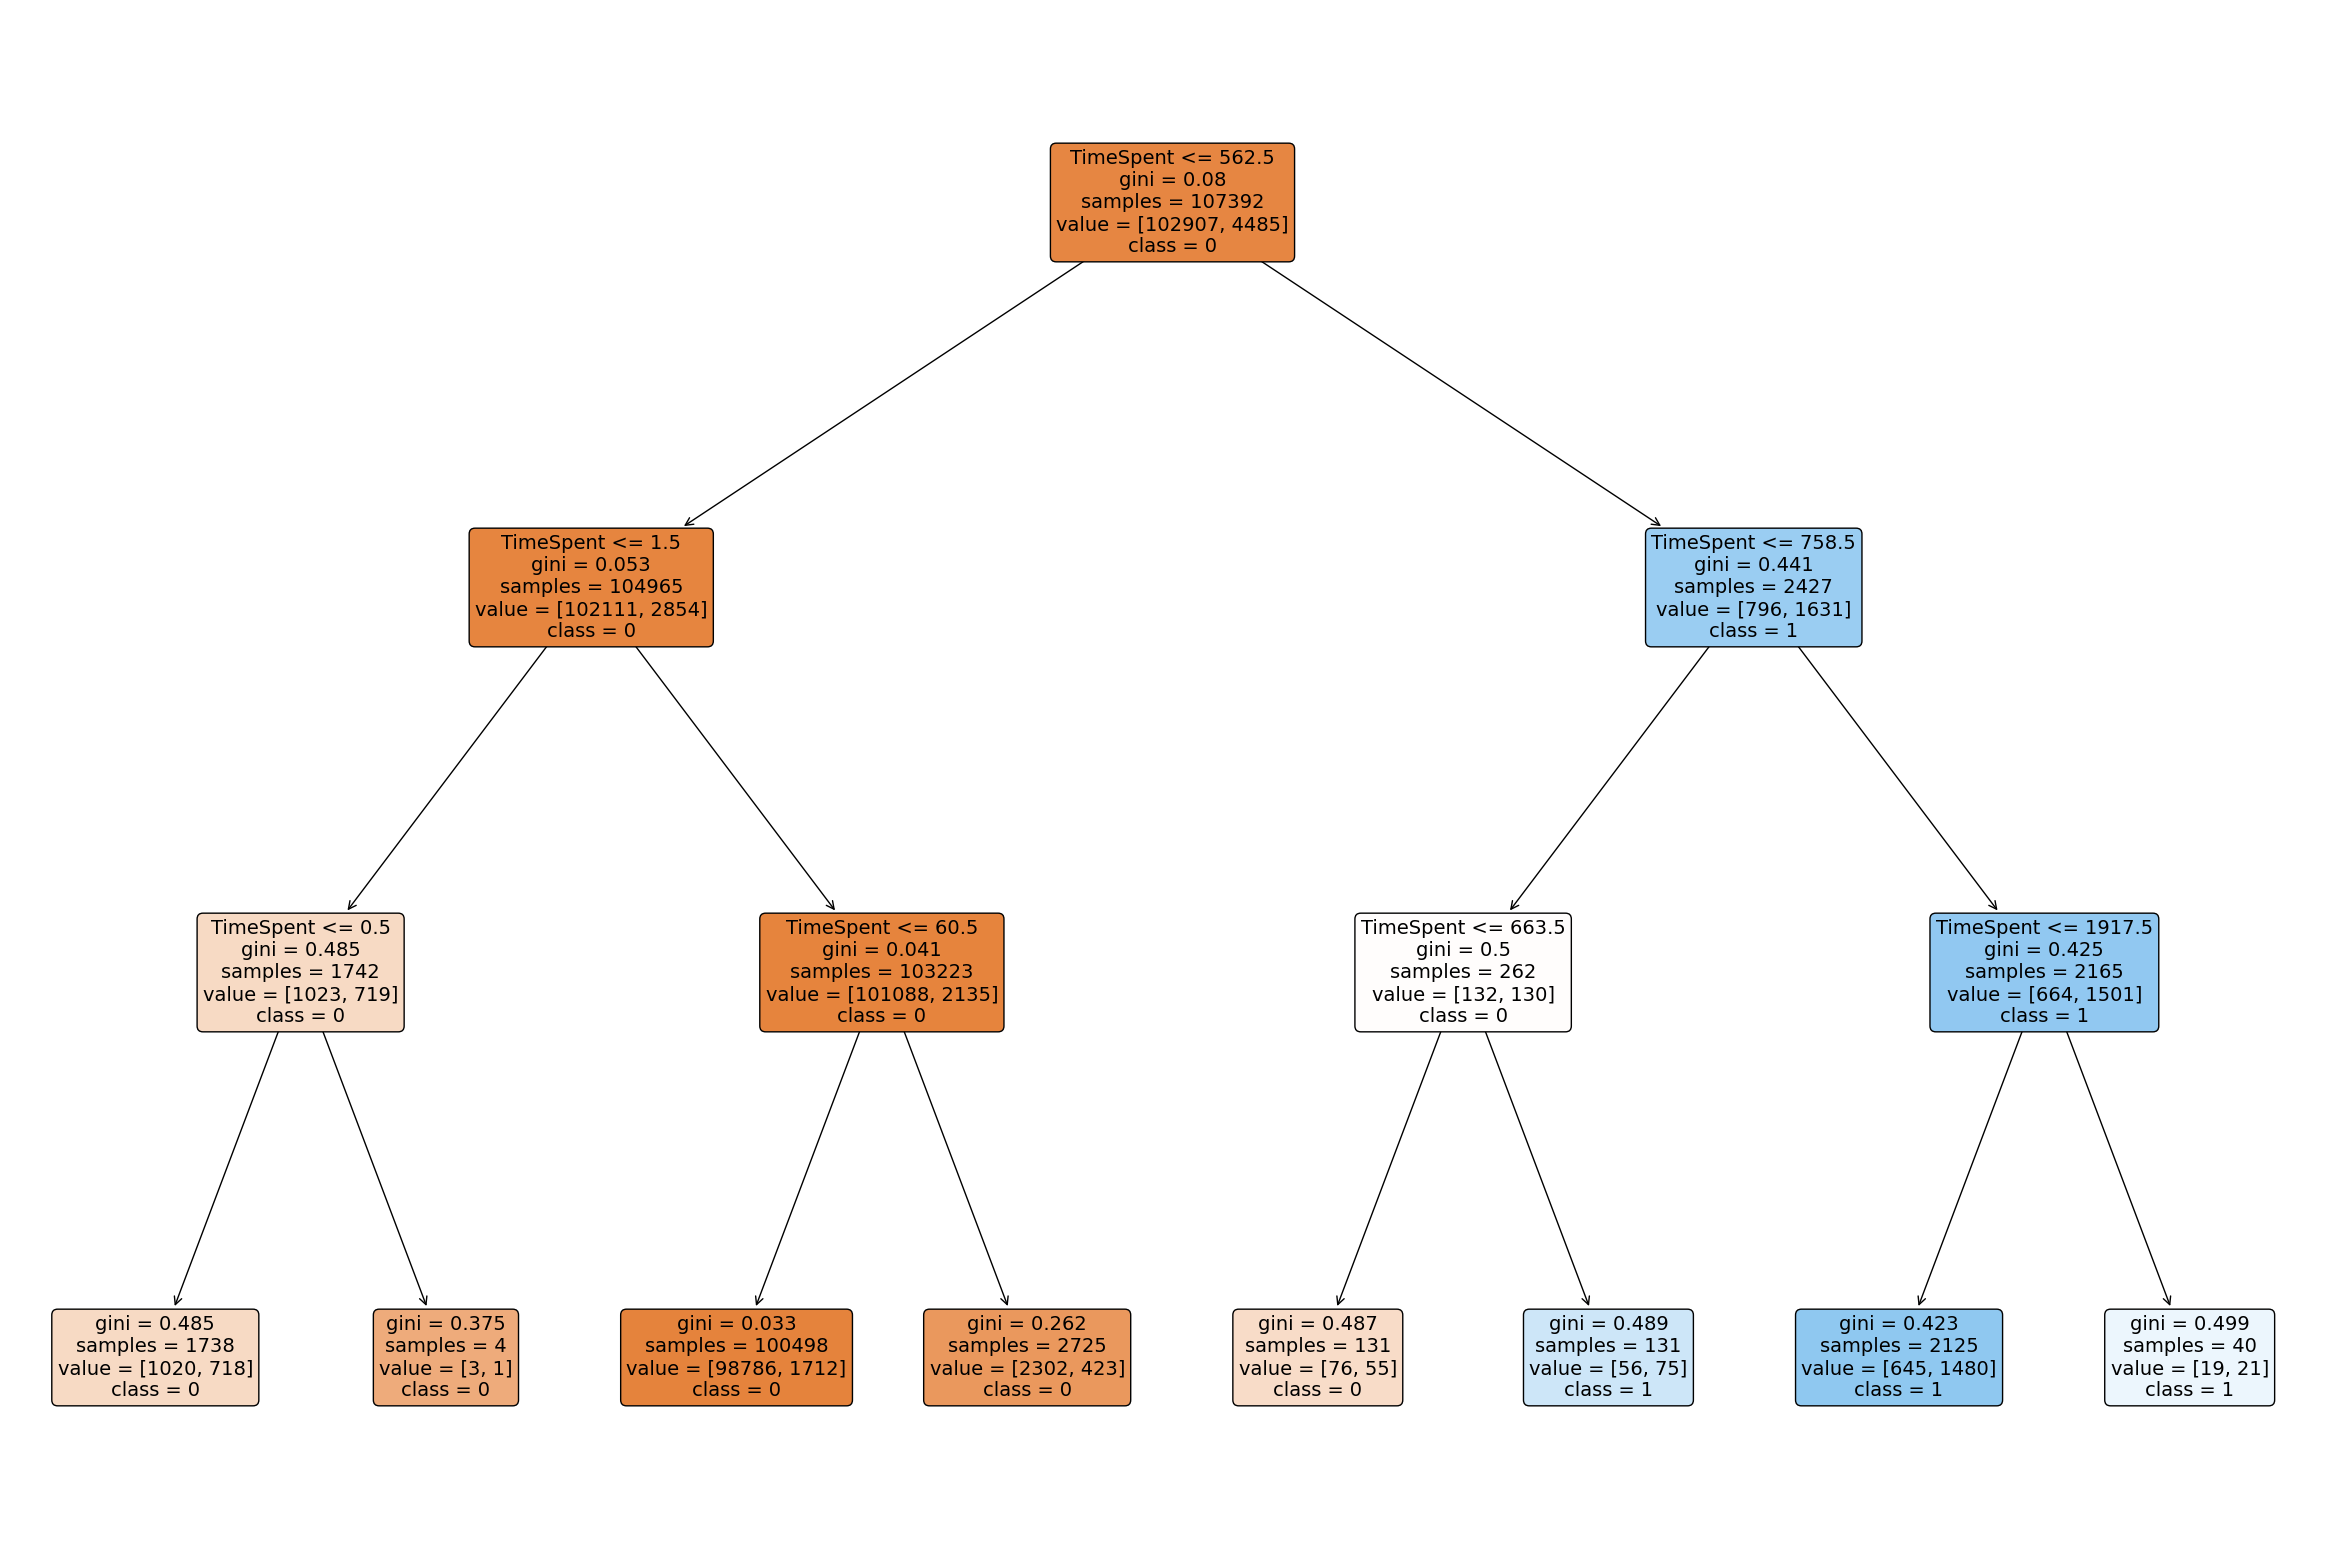

In [45]:
plt.figure(figsize=(30, 20))
tree.plot_tree(tree1, feature_names = Features, class_names = Classes, rounded= True, filled=True,fontsize = 14)
plt.show()

In [35]:
#Training Metrics
y_pred=tree1.predict(X)
accuracy_score(y, y_pred)

0.9692342073897497

In [36]:
f1_score(y,y_pred)

0.4576493762311228

In [37]:
#Test Metrics
y_pred=tree1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9644553995641768

In [38]:
f1_score(y_test,y_pred)

0.35515230071289694

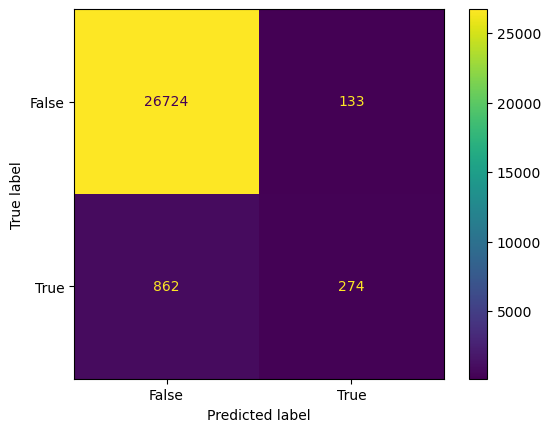

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

### Random Forest

In [37]:
def forest_cv(X_train,y_train,X_test,y_test,n,f,cv):
    model = RandomForestClassifier(n_estimators = n, max_features = f, max_depth=3).fit(X_train, y_train)

    test_score = model.score(X_test, y_test)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    return test_score, scores

In [38]:
for (n,f,cv) in [(100,2,5), (100,4,5), (200,2,5), (200,4,5),(300,2,5), (300,4,5), (100,2,3), (100,4,3),(200,2,3),(200,4,3),(300,2,3),(300,2,3)]:
    ts, sc = forest_cv(X, y, X_test, y_test, n, f, cv)
    print(f"n_estimators:{n:.2f} cv:{cv:2d} test_score:{ts:.6f} cross validation: mean {sc.mean():.6f} standard deviation: {sc.std():.6f} ")

n_estimators:100.00 cv: 5 test_score:0.967670 cross validation: mean 0.937230 standard deviation: 0.066259 
n_estimators:100.00 cv: 5 test_score:0.967670 cross validation: mean 0.937211 standard deviation: 0.066248 
n_estimators:200.00 cv: 5 test_score:0.967670 cross validation: mean 0.937220 standard deviation: 0.066254 
n_estimators:200.00 cv: 5 test_score:0.967635 cross validation: mean 0.937220 standard deviation: 0.066254 
n_estimators:300.00 cv: 5 test_score:0.967670 cross validation: mean 0.937248 standard deviation: 0.066271 
n_estimators:300.00 cv: 5 test_score:0.967670 cross validation: mean 0.937211 standard deviation: 0.066248 
n_estimators:100.00 cv: 3 test_score:0.967670 cross validation: mean 0.939669 standard deviation: 0.040657 
n_estimators:100.00 cv: 3 test_score:0.967670 cross validation: mean 0.939716 standard deviation: 0.040701 
n_estimators:200.00 cv: 3 test_score:0.967670 cross validation: mean 0.939679 standard deviation: 0.040666 
n_estimators:200.00 cv: 3 te

In [39]:
model = RandomForestClassifier(n_estimators = 100, max_features = 4, max_depth = 3).fit(X, y)

In [40]:
#Test Metrics
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9676347658343157

In [41]:
f1_score(y_test,y_pred)

0.46517119244391975

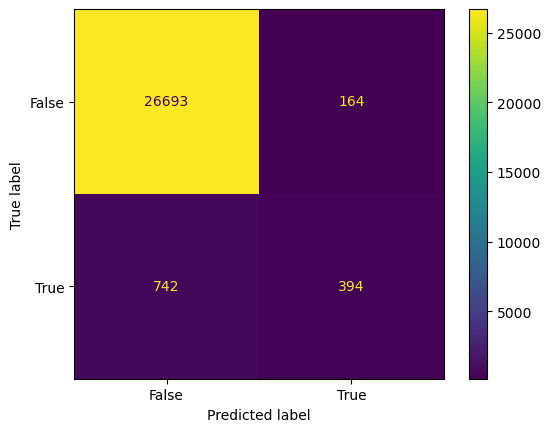

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 